In [24]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
print("Backend engine is '{}'".format(K.backend()))

Backend engine is 'tensorflow'


In [17]:
# input args.
batch_size = 128
num_classes = 10
epochs = 10

# image info.
img_rows, img_cols = 28,28

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [21]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [22]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 25

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


In [23]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [25]:
## Model Build
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [26]:
# compile
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.adam(),
             metrics=['accuracy'])

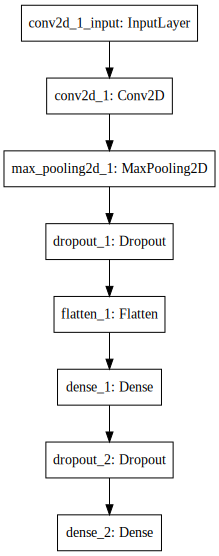

In [39]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [32]:
model.layers[0].input_shape

(None, 28, 28, 1)

In [31]:
model.layers[0].output_shape

(None, 26, 26, 32)

In [36]:
model.layers[-5].output_shape

(None, 13, 13, 32)

In [35]:
model.layers[-4].output_shape

(None, 5408)

In [37]:
model.layers[-3].output_shape

(None, 128)

In [40]:
## train
model.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 267us/step - loss: 0.3439 - acc: 0.8965 - val_loss: 0.3878 - val_acc: 0.9640
Epoch 2/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.1463 - acc: 0.9571 - val_loss: 0.3866 - val_acc: 0.9686
Epoch 3/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.1098 - acc: 0.9680 - val_loss: 0.4083 - val_acc: 0.9655
Epoch 4/10
60000/60000 [==============================] - 16s 269us/step - loss: 0.0901 - acc: 0.9733 - val_loss: 0.4121 - val_acc: 0.9667
Epoch 5/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.0770 - acc: 0.9759 - val_loss: 0.7602 - val_acc: 0.9408
Epoch 6/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.0680 - acc: 0.9788 - val_loss: 0.5860 - val_acc: 0.9524
Epoch 7/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.0610 - acc: 0.9812 - val_loss: 0.

In [43]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss {}'.format(score[0]))
print('Test acc {}'.format(score[1]))

Test loss 1.4074516747469803
Test acc 0.8969


In [55]:
sample_res = model.predict_proba(x_test[0].reshape(1,28,28,1))
sample_res

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

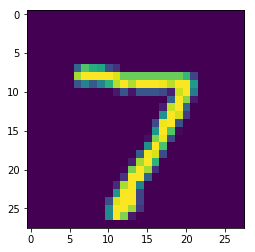

In [56]:
from matplotlib import pyplot as plt
plt.imshow(x_test[0].reshape(28,28))
plt.show()

In [49]:
x_test[0]

(28, 28, 1)